<a href="https://colab.research.google.com/github/EyeofaThous/AAE590/blob/main/AAE590HW3_Q1_METRICS_tbranno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import BayesianRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, Matern
from scipy.stats import pearsonr
from sklearn.metrics import r2_score, mean_absolute_error
# Load the Excel file
file_path = "Data590.xlsx"
xls = pd.ExcelFile(file_path)

Bayesian For Holes

Processing Load Case: 1mm Disp
1mm Disp - BLR -> R²: 0.0176, MAE: 153.3522


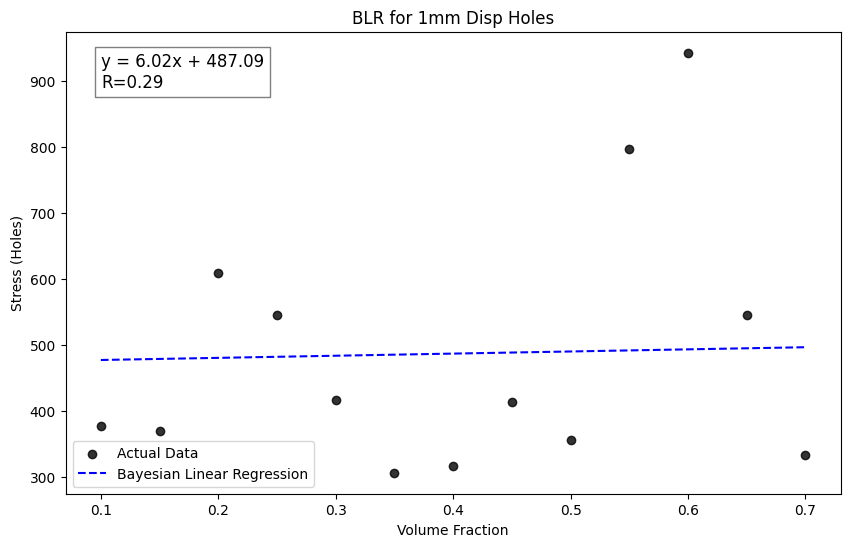

Processing Load Case: 5mm Disp
5mm Disp - BLR -> R²: 0.0000, MAE: 772.9694


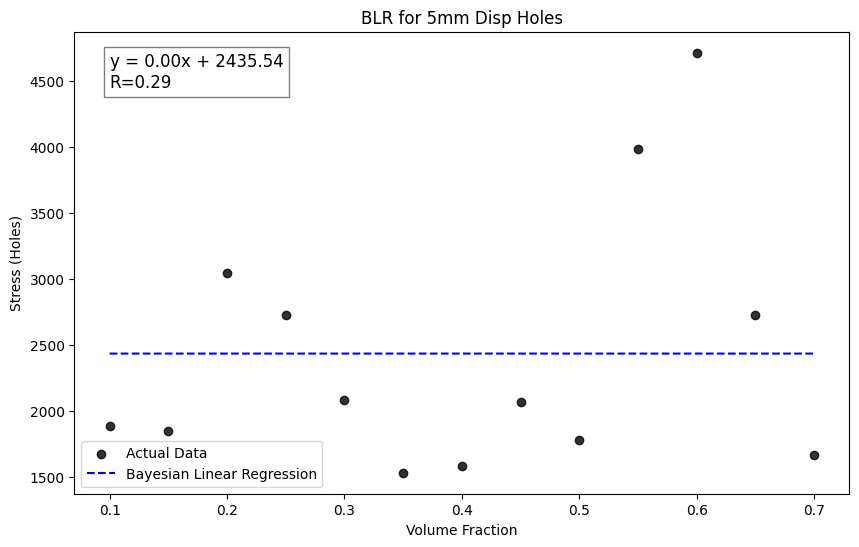

Processing Load Case: 100N Load
100N Load - BLR -> R²: 0.4296, MAE: 1.5203


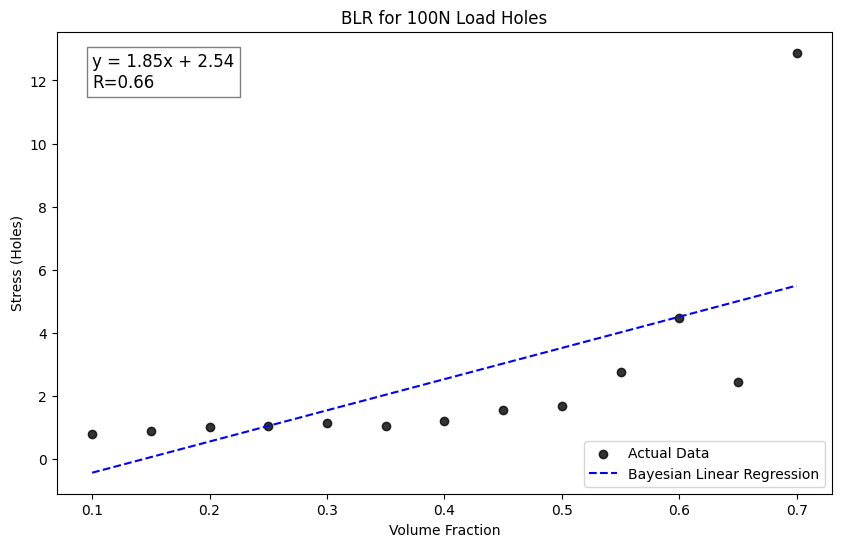

Processing Load Case: 500N Load
500N Load - BLR -> R²: 0.4296, MAE: 7.6000


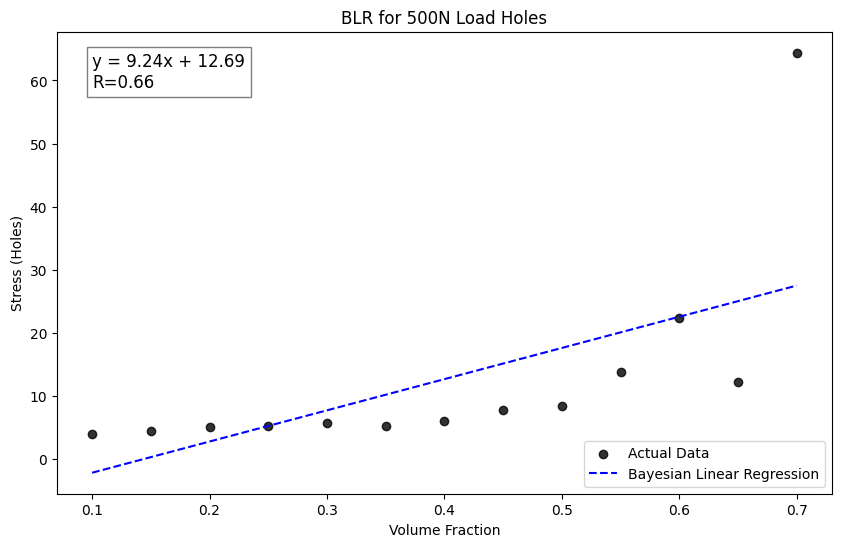

In [ ]:
# Loop through each sheet (load case)
for sheet_name in xls.sheet_names:
    print(f"Processing Load Case: {sheet_name}")

    # Read data from current sheet
    df = pd.read_excel(xls, sheet_name=sheet_name)

    # Define independent (X) and response variable (y) for "Holes"
    X = df.iloc[:, 0].values.reshape(-1, 1)  # Assuming 1st column is Volume Fraction
    y = df["Holes"].values  # Selecting Holes as response variable

    # Standardize X (optional, improves numerical stability)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # BLR
    blr = BayesianRidge()
    blr.fit(X_scaled, y)
    y_pred_blr = blr.predict(X_scaled)

    # For BLR
    r2_blr = r2_score(y, y_pred_blr)
    mae_blr = mean_absolute_error(y, y_pred_blr)
    print(f"{sheet_name} - BLR -> R²: {r2_blr:.4f}, MAE: {mae_blr:.4f}")
    plt.figure(figsize=(10, 6))

    # Calculate r value
    r_val,_=pearsonr(X_scaled.flatten(),y)

    # Equation
    slope = blr.coef_[0]
    intercept = blr.intercept_
    equation = f"y = {slope:.2f}x + {intercept:.2f}\nR={r_val:.2f}"
    plt.text(min(X),max(y),equation,fontsize=12,verticalalignment='top',bbox=dict(facecolor='white',alpha=0.5))
    # Actual Data
    plt.scatter(X, y, color='black', label="Actual Data", alpha=0.8)

    # Bayesian Linear Regression Line
    plt.plot(X, y_pred_blr, color='blue', label="Bayesian Linear Regression", linestyle='dashed')



    # Labels and legend
    plt.xlabel("Volume Fraction")
    plt.ylabel("Stress (Holes)")
    plt.title(f"BLR for {sheet_name} Holes")
    plt.legend()
    plt.show()

Gaussian For Holes

Processing Load Case: 1mm Disp
1mm Disp - GPR -> R²: 1.0000, MAE: 0.0000


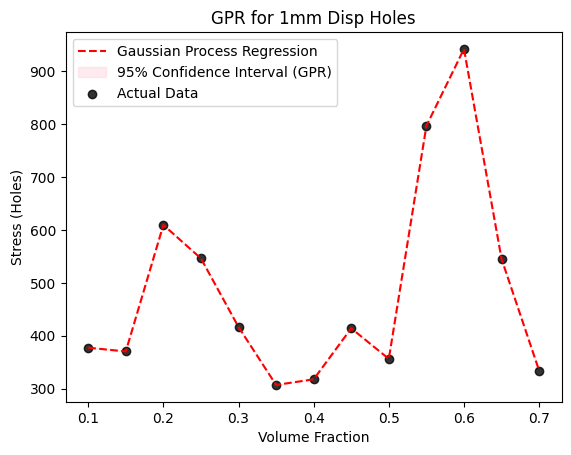

Optimized Kernel for GPR (1mm Disp): 522**2 * RBF(length_scale=0.0422)
Processing Load Case: 5mm Disp


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:478: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(


5mm Disp - GPR -> R²: 1.0000, MAE: 0.0000


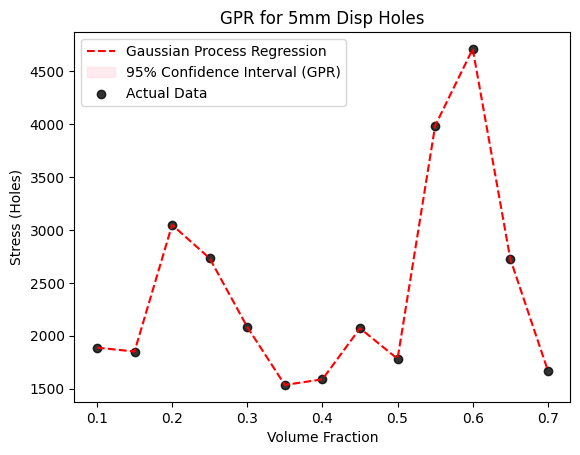

Optimized Kernel for GPR (5mm Disp): 2.19e+03**2 * RBF(length_scale=0.332)
Processing Load Case: 100N Load
100N Load - GPR -> R²: 1.0000, MAE: 0.0000


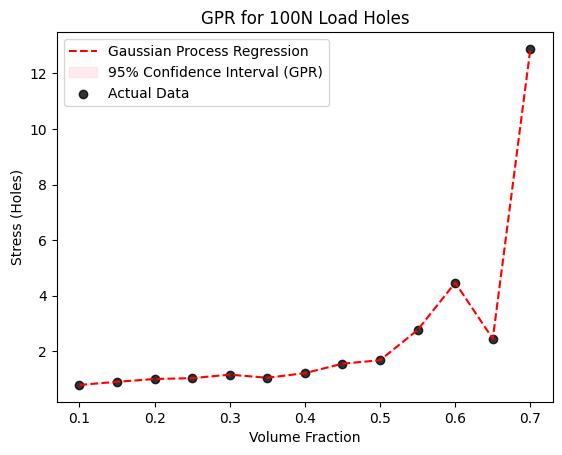

Optimized Kernel for GPR (100N Load): 4.29**2 * RBF(length_scale=0.219)
Processing Load Case: 500N Load
500N Load - GPR -> R²: 1.0000, MAE: 0.0000


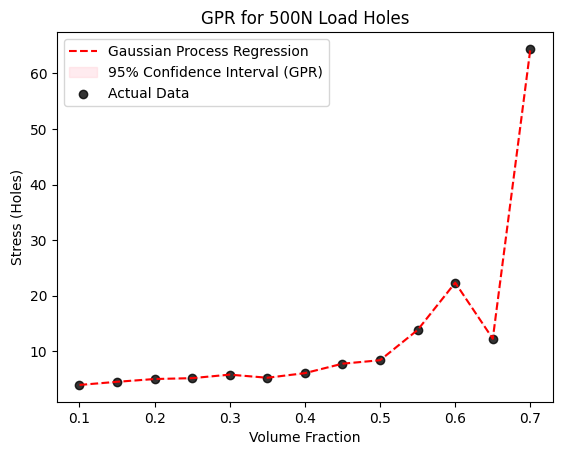

Optimized Kernel for GPR (500N Load): 21.4**2 * RBF(length_scale=0.219)


In [ ]:
for sheet_name in xls.sheet_names:
    print(f"Processing Load Case: {sheet_name}")

    # Read data from current sheet
    df = pd.read_excel(xls, sheet_name=sheet_name)

    # Define independent (X) and response variable (y) for "Holes"
    X = df.iloc[:, 0].values.reshape(-1, 1)  # Assuming 1st column is Volume Fraction
    y = df["Holes"].values  # Selecting Holes as response variable

    # Standardize X (optional, improves numerical stability)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    # GPR
    kernel = C(1.0, (1e-3, 1e7)) * RBF(1.0, (1e-2, 1e2))
    gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    gpr.fit(X_scaled, y)
    y_pred_gpr, y_std = gpr.predict(X_scaled, return_std=True)  # Get mean and std deviation

    # For GPR
    r2_gpr = r2_score(y, y_pred_gpr)
    mae_gpr = mean_absolute_error(y, y_pred_gpr)
    print(f"{sheet_name} - GPR -> R²: {r2_gpr:.4f}, MAE: {mae_gpr:.4f}")

    # Gaussian Process Mean Prediction
    plt.plot(X, y_pred_gpr, color='red', label="Gaussian Process Regression", linestyle='dashed')
     # Uncertainty Bounds (GPR)
    plt.fill_between(X.flatten(), y_pred_gpr - 1.96 * y_std, y_pred_gpr + 1.96 * y_std,
                     color='pink', alpha=0.3, label="95% Confidence Interval (GPR)")
    # Actual Data
    plt.scatter(X, y, color='black', label="Actual Data", alpha=0.8)
    # Labels and legend
    plt.xlabel("Volume Fraction")
    plt.ylabel("Stress (Holes)")
    plt.title(f"GPR for {sheet_name} Holes")
    plt.legend()
    plt.show()
    # Print Kernel after Optimization
    print(f"Optimized Kernel for GPR ({sheet_name}):", gpr.kernel_)

Bayessian for Mat A

Processing Load Case: 1mm Disp
1mm Disp - BLR -> R²: 0.2515, MAE: 80.2318


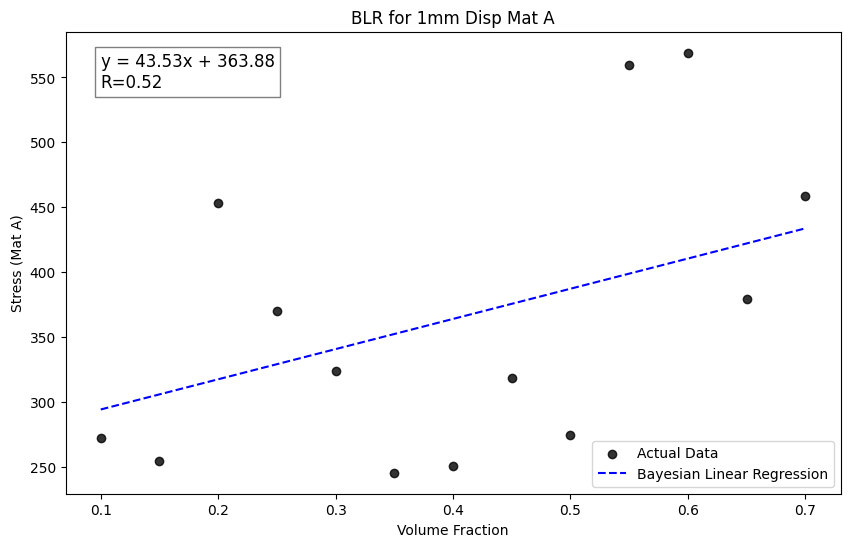

Processing Load Case: 5mm Disp
5mm Disp - BLR -> R²: 0.0000, MAE: 515.9112


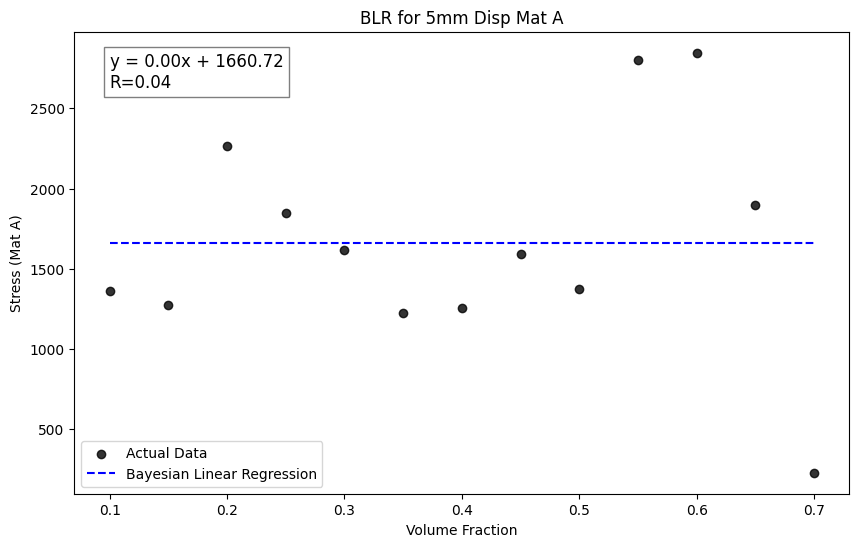

Processing Load Case: 100N Load
100N Load - BLR -> R²: 0.8295, MAE: 0.0954


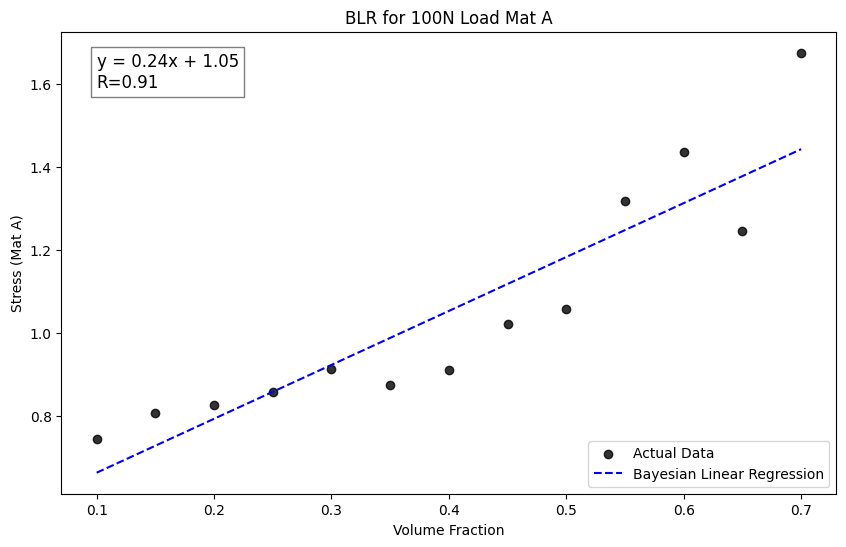

Processing Load Case: 500N Load
500N Load - BLR -> R²: 0.8295, MAE: 0.4770


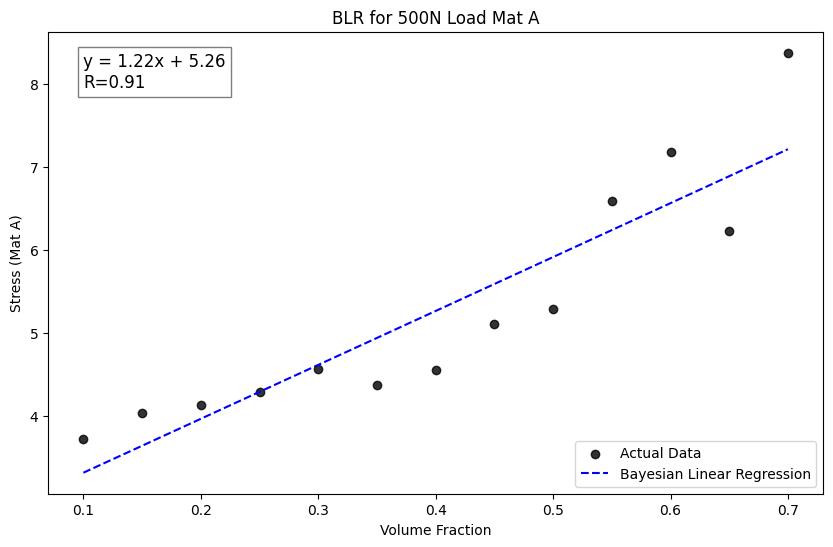

In [ ]:
# Loop through each sheet (load case)
for sheet_name in xls.sheet_names:
    print(f"Processing Load Case: {sheet_name}")

    # Read data from current sheet
    df = pd.read_excel(xls, sheet_name=sheet_name)

    # Define independent (X) and response variable (y) for "Mat A"
    X = df.iloc[:, 0].values.reshape(-1, 1)  # Assuming 1st column is Volume Fraction
    y = df["Mat A"].values  # Selecting Mat A as response variable

    # Standardize X (optional, improves numerical stability)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # BLR
    blr = BayesianRidge()
    blr.fit(X_scaled, y)
    y_pred_blr = blr.predict(X_scaled)

    plt.figure(figsize=(10, 6))
    # For BLR
    r2_blr = r2_score(y, y_pred_blr)
    mae_blr = mean_absolute_error(y, y_pred_blr)
    print(f"{sheet_name} - BLR -> R²: {r2_blr:.4f}, MAE: {mae_blr:.4f}")

    # Actual Data
    plt.scatter(X, y, color='black', label="Actual Data", alpha=0.8)
    # Calculate r value
    r_val,_=pearsonr(X_scaled.flatten(),y)
    # Equation
    slope = blr.coef_[0]
    intercept = blr.intercept_
    equation = f"y = {slope:.2f}x + {intercept:.2f}\nR={r_val:.2f}"
    plt.text(min(X),max(y),equation,fontsize=12,verticalalignment='top',bbox=dict(facecolor='white',alpha=0.5))
    # Bayesian Linear Regression Line
    plt.plot(X, y_pred_blr, color='blue', label="Bayesian Linear Regression", linestyle='dashed')



    # Labels and legend
    plt.xlabel("Volume Fraction")
    plt.ylabel("Stress (Mat A)")
    plt.title(f"BLR for {sheet_name} Mat A")
    plt.legend()
    plt.show()

Gaussian For Mat A

Processing Load Case: 1mm Disp
1mm Disp - GPR -> R²: 1.0000, MAE: 0.0000


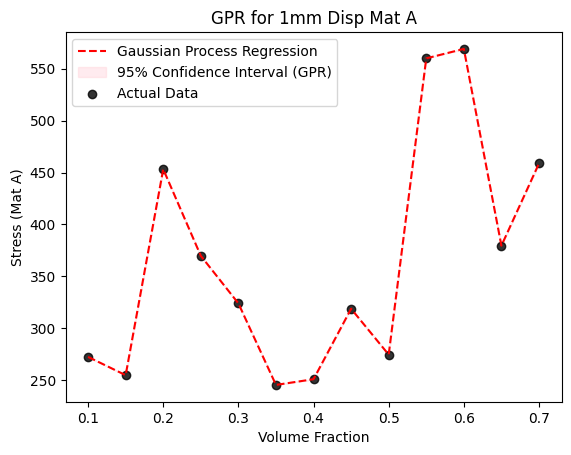

Optimized Kernel for GPR (1mm Disp): 334**2 * RBF(length_scale=0.319)
Processing Load Case: 5mm Disp
5mm Disp - GPR -> R²: 1.0000, MAE: 0.0000


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


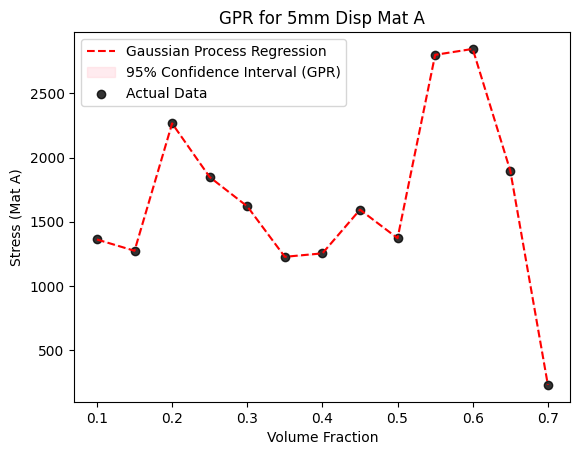

Optimized Kernel for GPR (5mm Disp): 1.79e+03**2 * RBF(length_scale=0.01)
Processing Load Case: 100N Load
100N Load - GPR -> R²: 1.0000, MAE: 0.0000


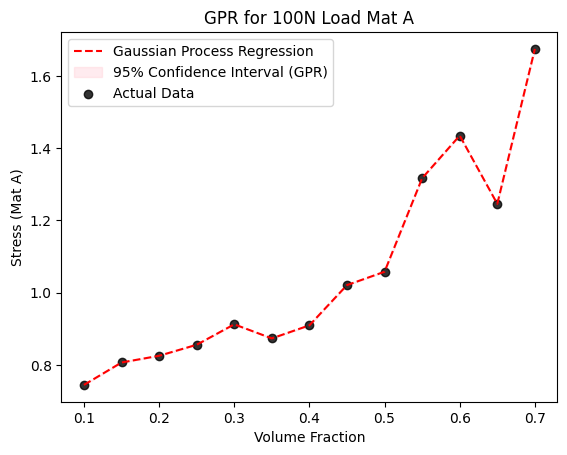

Optimized Kernel for GPR (100N Load): 1.11**2 * RBF(length_scale=0.454)
Processing Load Case: 500N Load
500N Load - GPR -> R²: 1.0000, MAE: 0.0000


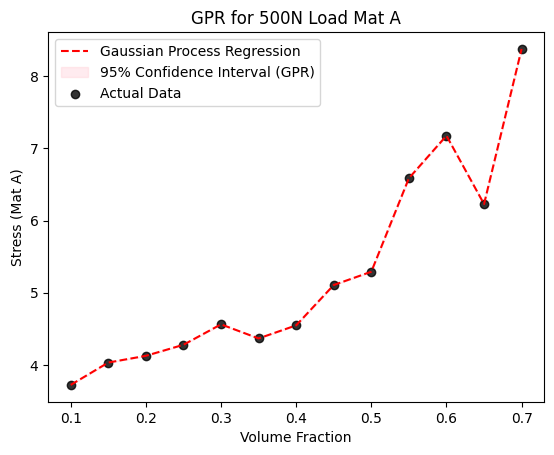

Optimized Kernel for GPR (500N Load): 5.53**2 * RBF(length_scale=0.454)


In [ ]:
for sheet_name in xls.sheet_names:
    print(f"Processing Load Case: {sheet_name}")

    # Read data from current sheet
    df = pd.read_excel(xls, sheet_name=sheet_name)

    # Define independent (X) and response variable (y) for "Mat A"
    X = df.iloc[:, 0].values.reshape(-1, 1)  # Assuming 1st column is Volume Fraction
    y = df["Mat A"].values  # Selecting Mat A as response variable

    # Standardize X (optional, improves numerical stability)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    # GPR
    kernel = C(1.0, (1e-3, 1e7)) * RBF(1.0, (1e-2, 1e2))
    gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    gpr.fit(X_scaled, y)
    y_pred_gpr, y_std = gpr.predict(X_scaled, return_std=True)  # Get mean and std deviation
    # For GPR
    r2_gpr = r2_score(y, y_pred_gpr)
    mae_gpr = mean_absolute_error(y, y_pred_gpr)
    print(f"{sheet_name} - GPR -> R²: {r2_gpr:.4f}, MAE: {mae_gpr:.4f}")
    # Gaussian Process Mean Prediction
    plt.plot(X, y_pred_gpr, color='red', label="Gaussian Process Regression", linestyle='dashed')
     # Uncertainty Bounds (GPR)
    plt.fill_between(X.flatten(), y_pred_gpr - 1.96 * y_std, y_pred_gpr + 1.96 * y_std,
                     color='pink', alpha=0.3, label="95% Confidence Interval (GPR)")

    # Actual Data
    plt.scatter(X, y, color='black', label="Actual Data", alpha=0.8)

    # Labels and legend
    plt.xlabel("Volume Fraction")
    plt.ylabel("Stress (Mat A)")
    plt.title(f"GPR for {sheet_name} Mat A")
    plt.legend()
    plt.show()
    # Print Kernel after Optimization
    print(f"Optimized Kernel for GPR ({sheet_name}):", gpr.kernel_)

Bayessian For Mat B

Processing Load Case: 1mm Disp
1mm Disp - BLR -> R²: 0.8420, MAE: 5.9856


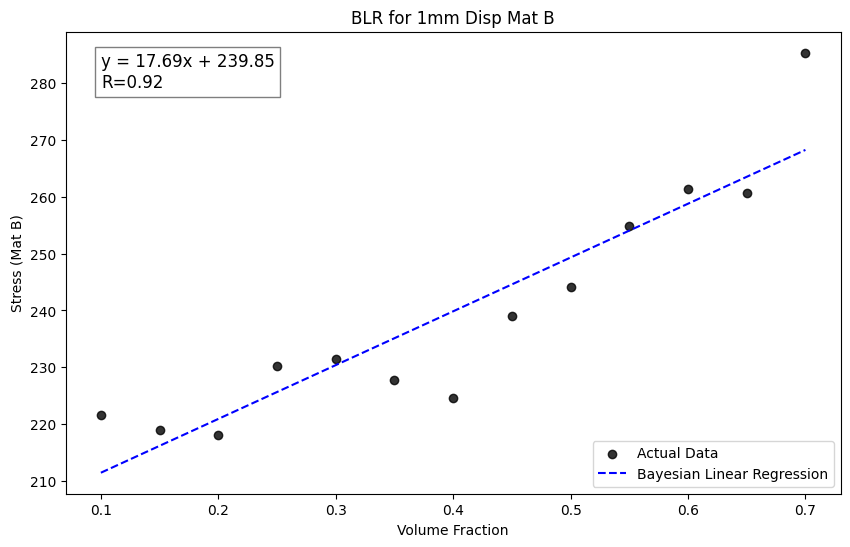

Processing Load Case: 5mm Disp
5mm Disp - BLR -> R²: 0.8409, MAE: 29.8823


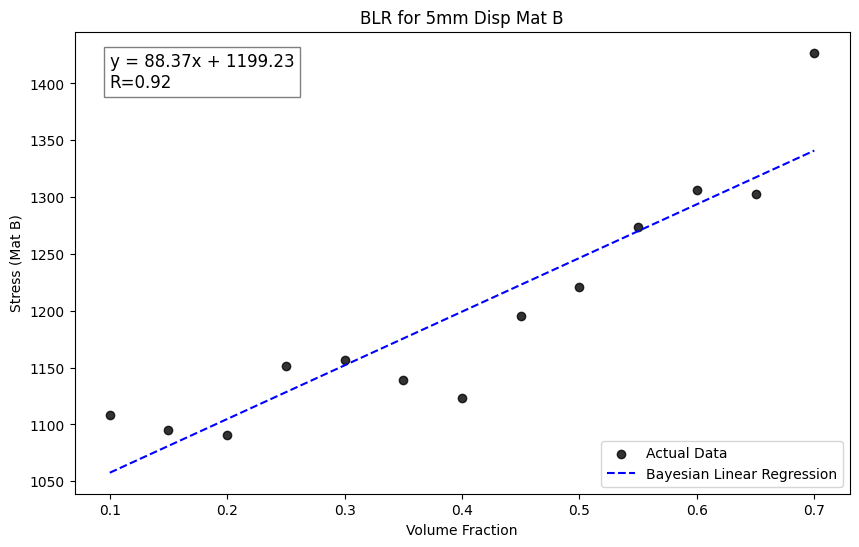

Processing Load Case: 100N Load
100N Load - BLR -> R²: 0.9489, MAE: 0.0083


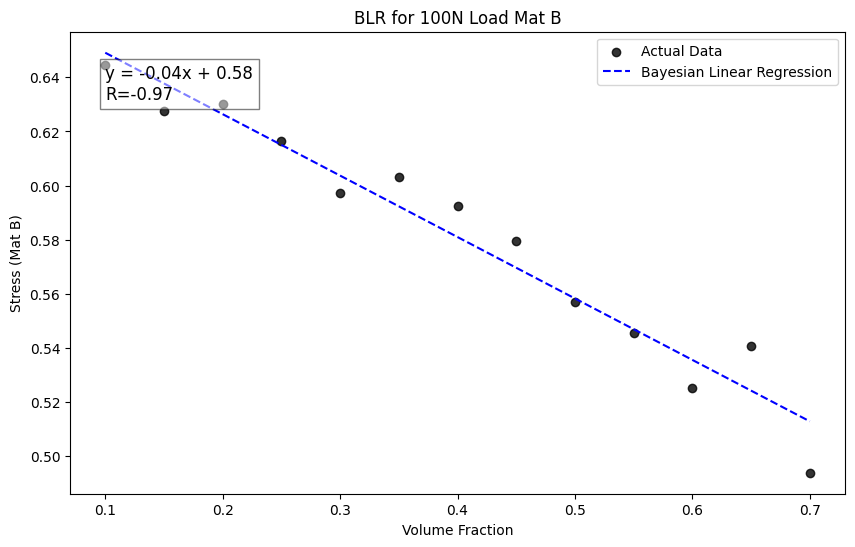

Processing Load Case: 500N Load
500N Load - BLR -> R²: 0.9502, MAE: 0.0405


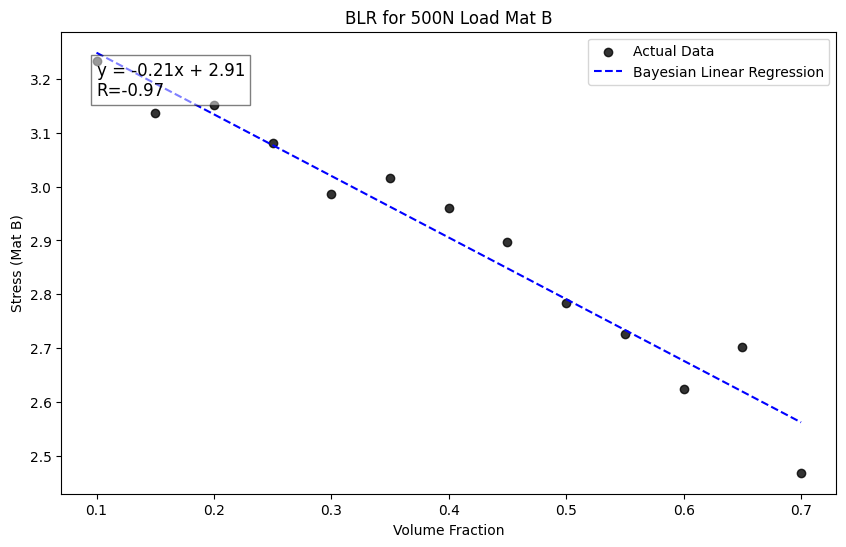

In [ ]:
# Loop through each sheet (load case)
for sheet_name in xls.sheet_names:
    print(f"Processing Load Case: {sheet_name}")

    # Read data from current sheet
    df = pd.read_excel(xls, sheet_name=sheet_name)

    # Define independent (X) and response variable (y) for "Mat B"
    X = df.iloc[:, 0].values.reshape(-1, 1)  # Assuming 1st column is Volume Fraction
    y = df["Mat B"].values  # Selecting Mat B as response variable

    # Standardize X (optional, improves numerical stability)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # BLR
    blr = BayesianRidge()
    blr.fit(X_scaled, y)
    y_pred_blr = blr.predict(X_scaled)
    # For BLR
    r2_blr = r2_score(y, y_pred_blr)
    mae_blr = mean_absolute_error(y, y_pred_blr)
    print(f"{sheet_name} - BLR -> R²: {r2_blr:.4f}, MAE: {mae_blr:.4f}")

    plt.figure(figsize=(10, 6))

    # Actual Data
    plt.scatter(X, y, color='black', label="Actual Data", alpha=0.8)
    # Calculate r value
    r_val,_=pearsonr(X_scaled.flatten(),y)
    # Equation
    slope = blr.coef_[0]
    intercept = blr.intercept_
    equation = f"y = {slope:.2f}x + {intercept:.2f}\nR={r_val:.2f}"
    plt.text(min(X),max(y),equation,fontsize=12,verticalalignment='top',bbox=dict(facecolor='white',alpha=0.5))
    # Bayesian Linear Regression Line
    plt.plot(X, y_pred_blr, color='blue', label="Bayesian Linear Regression", linestyle='dashed')



    # Labels and legend
    plt.xlabel("Volume Fraction")
    plt.ylabel("Stress (Mat B)")
    plt.title(f"BLR for {sheet_name} Mat B")
    plt.legend()
    plt.show()

Gaussian For Mat B

Processing Load Case: 1mm Disp
1mm Disp - GPR -> R²: 1.0000, MAE: 0.0000


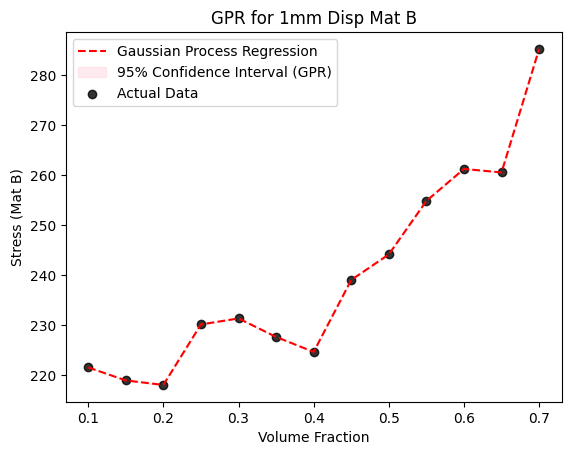

Optimized Kernel for GPR (1mm Disp): 136**2 * RBF(length_scale=0.238)
Processing Load Case: 5mm Disp
5mm Disp - GPR -> R²: 1.0000, MAE: 0.0000


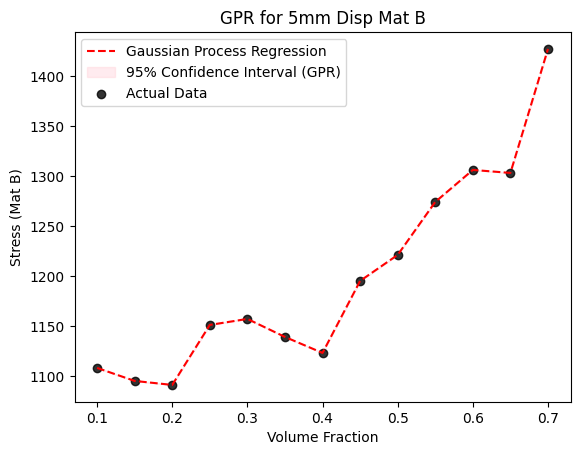

Optimized Kernel for GPR (5mm Disp): 1.2e+03**2 * RBF(length_scale=0.0141)
Processing Load Case: 100N Load
100N Load - GPR -> R²: 1.0000, MAE: 0.0000


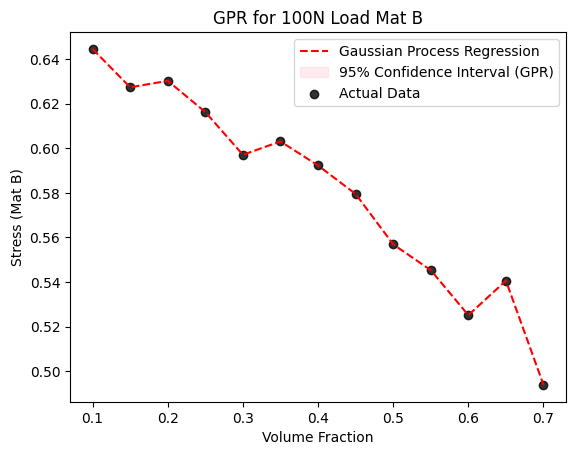

Optimized Kernel for GPR (100N Load): 0.393**2 * RBF(length_scale=0.442)
Processing Load Case: 500N Load
500N Load - GPR -> R²: 1.0000, MAE: 0.0000


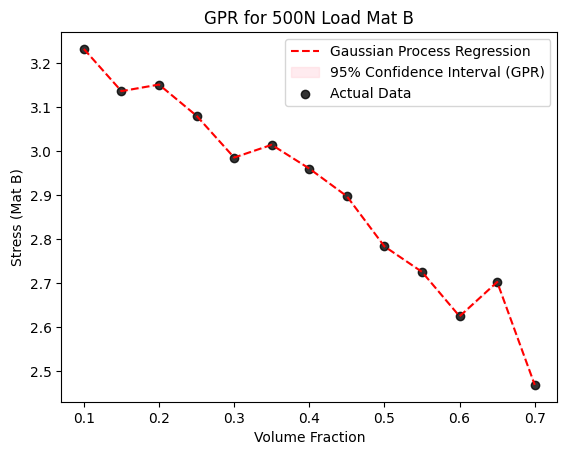

Optimized Kernel for GPR (500N Load): 1.97**2 * RBF(length_scale=0.442)


In [ ]:
for sheet_name in xls.sheet_names:
    print(f"Processing Load Case: {sheet_name}")

    # Read data from current sheet
    df = pd.read_excel(xls, sheet_name=sheet_name)

    # Define independent (X) and response variable (y) for "Mat B"
    X = df.iloc[:, 0].values.reshape(-1, 1)  # Assuming 1st column is Volume Fraction
    y = df["Mat B"].values  # Selecting Mat B as response variable

    # Standardize X (optional, improves numerical stability)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    # GPR
    kernel = C(1.0, (1e-3, 1e7)) * RBF(1.0, (1e-2, 1e2))
    gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
    gpr.fit(X_scaled, y)
    y_pred_gpr, y_std = gpr.predict(X_scaled, return_std=True)  # Get mean and std deviation
    # For GPR
    r2_gpr = r2_score(y, y_pred_gpr)
    mae_gpr = mean_absolute_error(y, y_pred_gpr)
    print(f"{sheet_name} - GPR -> R²: {r2_gpr:.4f}, MAE: {mae_gpr:.4f}")
    # Gaussian Process Mean Prediction
    plt.plot(X, y_pred_gpr, color='red', label="Gaussian Process Regression", linestyle='dashed')
     # Uncertainty Bounds (GPR)
    plt.fill_between(X.flatten(), y_pred_gpr - 1.96 * y_std, y_pred_gpr + 1.96 * y_std,
                     color='pink', alpha=0.3, label="95% Confidence Interval (GPR)")
    # Actual Data
    plt.scatter(X, y, color='black', label="Actual Data", alpha=0.8)
    # Labels and legend
    plt.xlabel("Volume Fraction")
    plt.ylabel("Stress (Mat B)")
    plt.title(f"GPR for {sheet_name} Mat B")
    plt.legend()
    plt.show()
    # Print Kernel after Optimization
    print(f"Optimized Kernel for GPR ({sheet_name}):", gpr.kernel_)